SVM Model Implementation

Why SVM? 
Can be used even for data sets which are not linear seperable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
Y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=4)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       107
           1       0.75      0.94      0.84        98

    accuracy                           0.82       205
   macro avg       0.84      0.83      0.82       205
weighted avg       0.84      0.82      0.82       205

Accuracy for SVM: 0.82


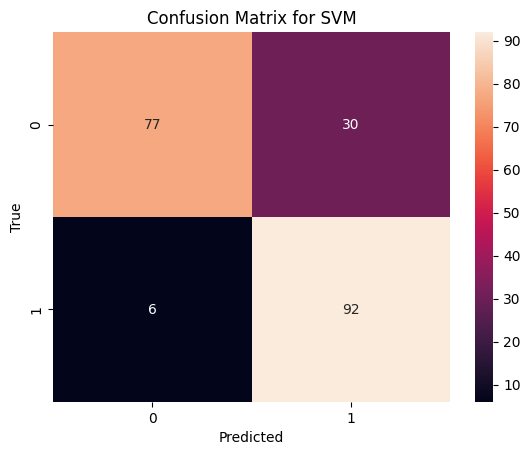

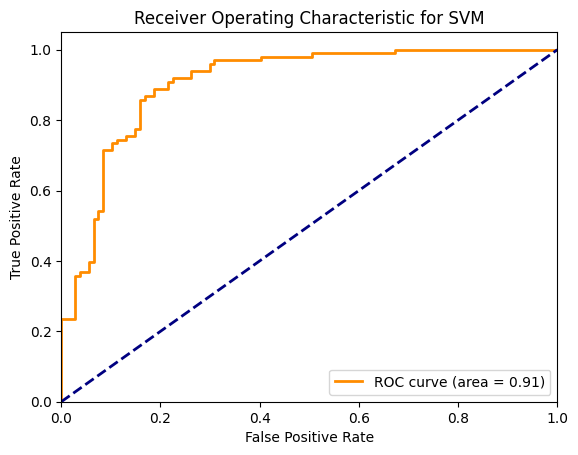

In [6]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

# Initialize classifiers
models = {
    'SVM': svm.SVC(kernel='linear', gamma='auto', C=2),
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_predict = model.predict(X_test)
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(Y_test, y_predict))
    
    # Accuracy
    accuracy = accuracy_score(Y_test, y_predict)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # use decision function for models without predict_proba
        y_prob = model.decision_function(X_test)
        
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()


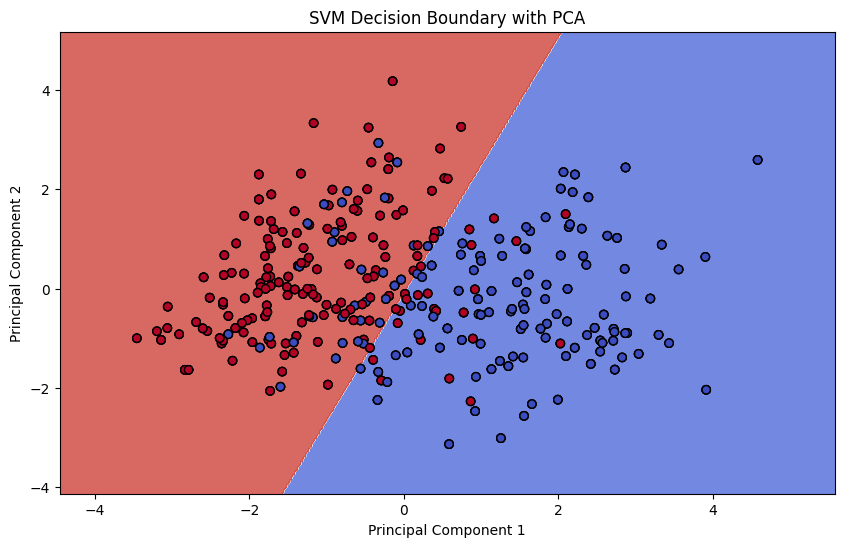

In [4]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train the SVM model on the reduced dataset
svm_model = svm.SVC(kernel='linear', gamma='auto', C=2)
svm_model.fit(X_reduced, Y)

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


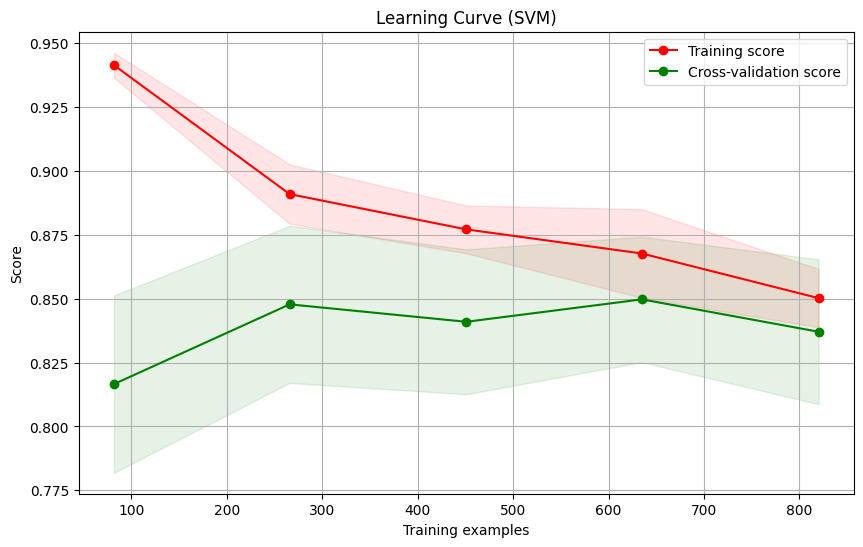

In [5]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve for SVM
plot_learning_curve(svm.SVC(kernel='linear', gamma='auto', C=2), "Learning Curve (SVM)", X_scaled, Y, cv=5)
plt.show()
